In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Price_Agriculture_commodities_Week.csv")
df.head()

,Commodity,State,District,Market,Arrival_Date,Min Price,Max Price,Modal Price
0,Ajwan,Gujarat,Ahmedabad,Mandal,30-07-2023,12250.0,16870.0,14250.0
1,Ajwan,Rajasthan,Chittorgarh,Pratapgarh,01-08-2023,14991.0,18200.0,15758.0
2,Ajwan,Gujarat,Jamnagar,Jamnagar,01-08-2023,11800.0,20000.0,17350.0
3,Ajwan,Andhra Pradesh,Kurnool,Kurnool,01-08-2023,4220.0,19688.0,17220.0
4,Ajwan,Gujarat,Mehsana,Unjha,01-08-2023,10500.0,16940.0,15750.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Commodity     23093 non-null  object 
 1   State         23093 non-null  object 
 2   District      23093 non-null  object 
 3   Market        23093 non-null  object 
 4   Arrival_Date  23093 non-null  object 
 5   Min Price     23093 non-null  float64
 6   Max Price     23093 non-null  float64
 7   Modal Price   23093 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()
# ! no null values

Commodity       0
State           0
District        0
Market          0
Arrival_Date    0
Min Price       0
Max Price       0
Modal Price     0
dtype: int64

In [5]:

# ! need to split dates
date_dict= {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"}
date_dict


{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [6]:
Day=[]
Month=[]
Year=[]
for d in df["Arrival_Date"]:
    date=d.split("-")
    Day.append(int(date[0]))
    Month.append(date_dict[int(date[1])])
    Year.append(int(date[2]))
    # print(date)


In [7]:
# df["Day"]=Day
# df["Month"]=Month
# df["Year"]=Year
df

,Commodity,State,District,Market,Arrival_Date,Min Price,Max Price,Modal Price
0,Ajwan,Gujarat,Ahmedabad,Mandal,30-07-2023,12250.0,16870.0,14250.0
1,Ajwan,Rajasthan,Chittorgarh,Pratapgarh,01-08-2023,14991.0,18200.0,15758.0
2,Ajwan,Gujarat,Jamnagar,Jamnagar,01-08-2023,11800.0,20000.0,17350.0
3,Ajwan,Andhra Pradesh,Kurnool,Kurnool,01-08-2023,4220.0,19688.0,17220.0
4,Ajwan,Gujarat,Mehsana,Unjha,01-08-2023,10500.0,16940.0,15750.0
...,...,...,...,...,...,...,...,...
23088,Yam (Ratalu),Telangana,Warangal,Warangal,28-07-2023,4500.0,5000.0,4750.0
23089,Yam (Ratalu),Telangana,Warangal,Warangal,29-07-2023,3200.0,3500.0,3350.0
23090,Yam (Ratalu),Telangana,Warangal,Warangal,30-07-2023,5500.0,6000.0,5750.0
23091,Yam (Ratalu),Telangana,Warangal,Warangal,31-07-2023,4500.0,5000.0,4750.0


In [8]:
season=[]
for month in Month:
    if month == "January" or month=="February":
        season.append("Winter")
    elif month == "March" or month=="April":
        season.append("Spring")
    elif month == "May" or month=="June":
        season.append("Summer")
    elif month == "July" or month=="August":
        season.append("Monsoon")
    elif month=="September" or month=="October":
        season.append("Autumn")
    elif month=="November" or month=="December":
        season.append("Pre-winter")

In [9]:
df["Season"]=season

In [10]:
df

,Commodity,State,District,Market,Arrival_Date,Min Price,Max Price,Modal Price,Season
0,Ajwan,Gujarat,Ahmedabad,Mandal,30-07-2023,12250.0,16870.0,14250.0,Monsoon
1,Ajwan,Rajasthan,Chittorgarh,Pratapgarh,01-08-2023,14991.0,18200.0,15758.0,Monsoon
2,Ajwan,Gujarat,Jamnagar,Jamnagar,01-08-2023,11800.0,20000.0,17350.0,Monsoon
3,Ajwan,Andhra Pradesh,Kurnool,Kurnool,01-08-2023,4220.0,19688.0,17220.0,Monsoon
4,Ajwan,Gujarat,Mehsana,Unjha,01-08-2023,10500.0,16940.0,15750.0,Monsoon
...,...,...,...,...,...,...,...,...,...
23088,Yam (Ratalu),Telangana,Warangal,Warangal,28-07-2023,4500.0,5000.0,4750.0,Monsoon
23089,Yam (Ratalu),Telangana,Warangal,Warangal,29-07-2023,3200.0,3500.0,3350.0,Monsoon
23090,Yam (Ratalu),Telangana,Warangal,Warangal,30-07-2023,5500.0,6000.0,5750.0,Monsoon
23091,Yam (Ratalu),Telangana,Warangal,Warangal,31-07-2023,4500.0,5000.0,4750.0,Monsoon


In [11]:
day_of_week=[]
for w in df["Arrival_Date"]:
    dt=pd.Timestamp(w)
    day=dt.day_of_week
    day_of_week.append(day)


In [12]:
df["Day"]=day_of_week
df["Month"]=Month
df

,Commodity,State,District,Market,Arrival_Date,Min Price,Max Price,Modal Price,Season,Day,Month
0,Ajwan,Gujarat,Ahmedabad,Mandal,30-07-2023,12250.0,16870.0,14250.0,Monsoon,6,July
1,Ajwan,Rajasthan,Chittorgarh,Pratapgarh,01-08-2023,14991.0,18200.0,15758.0,Monsoon,6,August
2,Ajwan,Gujarat,Jamnagar,Jamnagar,01-08-2023,11800.0,20000.0,17350.0,Monsoon,6,August
3,Ajwan,Andhra Pradesh,Kurnool,Kurnool,01-08-2023,4220.0,19688.0,17220.0,Monsoon,6,August
4,Ajwan,Gujarat,Mehsana,Unjha,01-08-2023,10500.0,16940.0,15750.0,Monsoon,6,August
...,...,...,...,...,...,...,...,...,...,...,...
23088,Yam (Ratalu),Telangana,Warangal,Warangal,28-07-2023,4500.0,5000.0,4750.0,Monsoon,4,July
23089,Yam (Ratalu),Telangana,Warangal,Warangal,29-07-2023,3200.0,3500.0,3350.0,Monsoon,5,July
23090,Yam (Ratalu),Telangana,Warangal,Warangal,30-07-2023,5500.0,6000.0,5750.0,Monsoon,6,July
23091,Yam (Ratalu),Telangana,Warangal,Warangal,31-07-2023,4500.0,5000.0,4750.0,Monsoon,0,July


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Commodity     23093 non-null  object 
 1   State         23093 non-null  object 
 2   District      23093 non-null  object 
 3   Market        23093 non-null  object 
 4   Arrival_Date  23093 non-null  object 
 5   Min Price     23093 non-null  float64
 6   Max Price     23093 non-null  float64
 7   Modal Price   23093 non-null  float64
 8   Season        23093 non-null  object 
 9   Day           23093 non-null  int64  
 10  Month         23093 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.9+ MB


In [14]:
df=df.iloc[:,[0,1,2,3,4,5,6,7,10,8,9]]

In [15]:
# del df["Arrival_Date"]
df

,Commodity,State,District,Market,Arrival_Date,Min Price,Max Price,Modal Price,Month,Season,Day
0,Ajwan,Gujarat,Ahmedabad,Mandal,30-07-2023,12250.0,16870.0,14250.0,July,Monsoon,6
1,Ajwan,Rajasthan,Chittorgarh,Pratapgarh,01-08-2023,14991.0,18200.0,15758.0,August,Monsoon,6
2,Ajwan,Gujarat,Jamnagar,Jamnagar,01-08-2023,11800.0,20000.0,17350.0,August,Monsoon,6
3,Ajwan,Andhra Pradesh,Kurnool,Kurnool,01-08-2023,4220.0,19688.0,17220.0,August,Monsoon,6
4,Ajwan,Gujarat,Mehsana,Unjha,01-08-2023,10500.0,16940.0,15750.0,August,Monsoon,6
...,...,...,...,...,...,...,...,...,...,...,...
23088,Yam (Ratalu),Telangana,Warangal,Warangal,28-07-2023,4500.0,5000.0,4750.0,July,Monsoon,4
23089,Yam (Ratalu),Telangana,Warangal,Warangal,29-07-2023,3200.0,3500.0,3350.0,July,Monsoon,5
23090,Yam (Ratalu),Telangana,Warangal,Warangal,30-07-2023,5500.0,6000.0,5750.0,July,Monsoon,6
23091,Yam (Ratalu),Telangana,Warangal,Warangal,31-07-2023,4500.0,5000.0,4750.0,July,Monsoon,0


Removing outlayers

In [16]:
q1=np.percentile(df["Modal Price"],25,interpolation="midpoint")

q3=np.percentile(df["Modal Price"],75,interpolation="midpoint")

IQR=q3-q1
upper=np.where(df["Modal Price"]>=(q3+1.5*IQR))

lower=np.where(df["Modal Price"]<=(q1-1.5*IQR))
# lower_bound=q1-(1.5*IQR)

# upper_bound=q3+(1.5*IQR)
print(upper[0],lower[0])

[    0     1     2 ... 22300 22728 23087] []


<Axes: ylabel='Modal Price'>

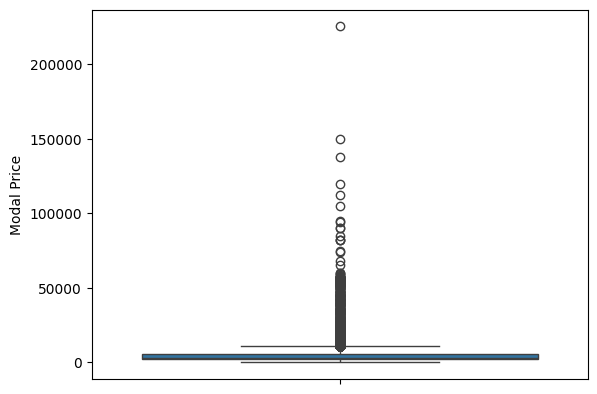

In [17]:
import seaborn as sns

sns.boxplot(df["Modal Price"])

In [18]:
df.drop(upper[0],inplace=True)

df.drop(lower[0],inplace=True)
df.shape

C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_21184\3645183848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(upper[0],inplace=True)
C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_21184\3645183848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(lower[0],inplace=True)


(21696, 11)

<Axes: ylabel='Modal Price'>

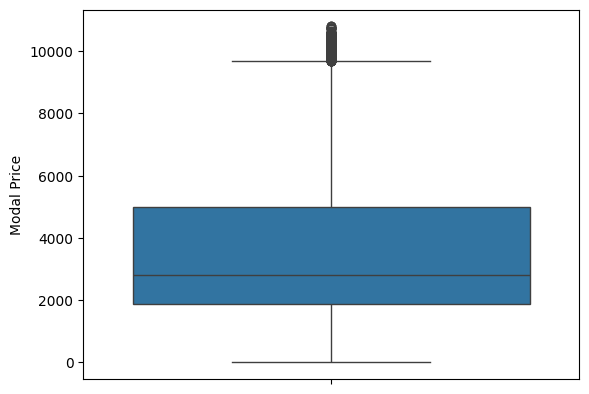

In [19]:
sns.boxplot(df["Modal Price"])

In [20]:
import plotly.express as px

In [21]:
2**16

65536

In [22]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,99))
# sns.relplot(data=df,x="State",y="Modal Price",hue="Season",kind="line")

In [23]:
# sns.relplot(data=df,x="District",y="Modal Price",hue="Season",kind="line")

In [24]:
fig=px.bar(df,x="District",y="Modal Price",color="Season",height=400)
fig.show()

In [25]:
del df["Arrival_Date"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21696 entries, 5 to 23092
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Commodity    21696 non-null  object 
 1   State        21696 non-null  object 
 2   District     21696 non-null  object 
 3   Market       21696 non-null  object 
 4   Min Price    21696 non-null  float64
 5   Max Price    21696 non-null  float64
 6   Modal Price  21696 non-null  float64
 7   Month        21696 non-null  object 
 8   Season       21696 non-null  object 
 9   Day          21696 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 1.8+ MB


In [26]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd



Commodity_encoder = LabelEncoder()
df["Commodity"] = Commodity_encoder.fit_transform(df["Commodity"])

State_encoder = LabelEncoder()
df["State"] = State_encoder.fit_transform(df["State"])
District_encoder = LabelEncoder()
df["District"] = District_encoder.fit_transform(df["District"])

Market_encoder = LabelEncoder()
df["Market"] = Market_encoder.fit_transform(df["Market"])
Month_encoder = LabelEncoder()
df["Month"] = Month_encoder.fit_transform(df["Month"])
Season_encoder = LabelEncoder()
df["Season"] = Season_encoder.fit_transform(df["Season"])
# List of categorical columns to encode
# categorical_columns = ['Commodity', 'State', 'District', 'Market',"Month","Season"]

df.head()


C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_21184\210177965.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_21184\210177965.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_21184\210177965.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Commodity,State,District,Market,Min Price,Max Price,Modal Price,Month,Season,Day
5,0,5,357,336,6205.0,6320.0,6262.0,1,0,4
7,1,11,285,18,5050.0,5050.0,5050.0,0,0,6
9,2,21,0,690,4500.0,4500.0,4500.0,1,0,0
10,2,21,0,690,4200.0,4200.0,4200.0,0,0,6
11,2,9,35,974,2800.0,3200.0,3000.0,1,0,4


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21696 entries, 5 to 23092
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Commodity    21696 non-null  int32  
 1   State        21696 non-null  int32  
 2   District     21696 non-null  int32  
 3   Market       21696 non-null  int32  
 4   Min Price    21696 non-null  float64
 5   Max Price    21696 non-null  float64
 6   Modal Price  21696 non-null  float64
 7   Month        21696 non-null  int32  
 8   Season       21696 non-null  int32  
 9   Day          21696 non-null  int64  
dtypes: float64(3), int32(6), int64(1)
memory usage: 1.3 MB


In [28]:
state_name=State_encoder.inverse_transform([1])
state_name

array(['Andhra Pradesh'], dtype=object)

<Axes: >

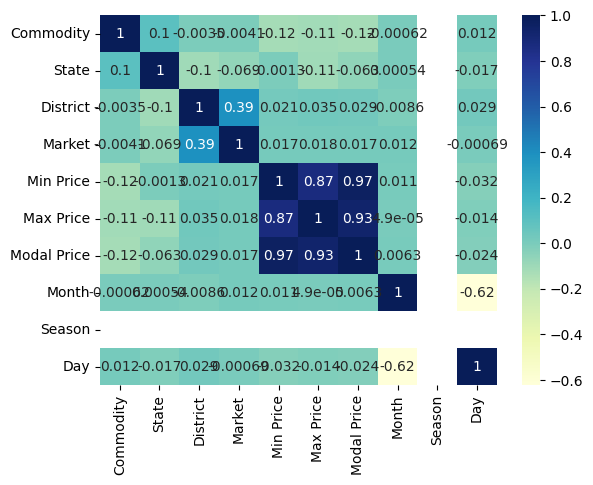

In [29]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,
            # fmt="g"
            )

In [30]:
df.columns

Index(['Commodity', 'State', 'District', 'Market', 'Min Price', 'Max Price',
       'Modal Price', 'Month', 'Season', 'Day'],
      dtype='object')

In [31]:
features=df[['Commodity', 'State', 'District', 'Market', 'Month', 'Season', 'Day']].values

labels=df['Modal Price']


In [32]:
from sklearn.model_selection import train_test_split
X_train,Xtest, y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=42)
X_train,Xtest, y_train,y_test

(array([[ 78,   5,  12, ...,   1,   0,   0],
        [159,  18, 316, ...,   1,   0,   5],
        [193,   5, 356, ...,   1,   0,   0],
        ...,
        [ 26,  21, 153, ...,   0,   0,   6],
        [ 12,   5,  33, ...,   1,   0,   5],
        [140,   7, 332, ...,   1,   0,   4]], dtype=int64),
 array([[ 19,  23, 111, ...,   1,   0,   4],
        [ 21,   6, 174, ...,   0,   0,   6],
        [ 11,  10, 364, ...,   1,   0,   0],
        ...,
        [  9,   9,  55, ...,   0,   0,   6],
        [152,  13, 387, ...,   1,   0,   0],
        [ 17,   6, 230, ...,   0,   0,   6]], dtype=int64),
 11004     4500.0
 20505     2500.0
 22236    10000.0
 11494     4500.0
 22972     2295.0
           ...   
 12940     3300.0
 22971     2414.0
 5767      3200.0
 1157      2200.0
 16884     4200.0
 Name: Modal Price, Length: 17356, dtype: float64,
 2716      5670.0
 3371      1900.0
 1109      2900.0
 10473     7300.0
 6613      2100.0
           ...   
 13355     6780.0
 15330     2500.0
 770      1

In [33]:
from sklearn.metrics import *
from sklearn import tree
from sklearn.ensemble import *
from sklearn.datasets import *

In [34]:
rand_for=RandomForestRegressor(n_estimators=100,max_depth=1000,random_state=42)

rand_for.fit(X_train,y_train)

rand_for_pred=rand_for.predict(Xtest)
r2_score(y_test,rand_for_pred)

0.8370321427958555

In [35]:
from sklearn.linear_model import LinearRegression
log_reg=LinearRegression()

log_reg.fit(X_train,y_train)

log_reg_pred=log_reg.predict(Xtest)

r2_score(y_test,log_reg_pred)

0.016409868863790256

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

dtr.fit(X_train,y_train)

dtr_pred=dtr.predict(Xtest)

r2_score(y_test,dtr_pred)

0.7798276850480839

predictions

In [37]:
for month in Month:
    if month == "January" or month=="February":
        season.append("Winter")
    elif month == "March" or month=="April":
        season.append("Spring")
    elif month == "May" or month=="June":
        season.append("Summer")
    elif month == "July" or month=="August":
        season.append("Monsoon")
    elif month=="September" or month=="October":
        season.append("Autumn")
    elif month=="November" or month=="December":
        season.append("Pre-winter")

In [38]:
user_input=["Ajwan","Gujarat","Ahmedabad","Mandal","30-07-2023"]
Day=[]
month=[]
Year=[]
season=[]
# for d in user_input[4]:
date=user_input[4].split("-")
print(date)
Day=date[0]
month=date_dict[int(date[1])]
Year=date[2]

if month == "January" or month=="February":
    season="Winter"
elif month == "March" or month=="April":
    season="Spring"
elif month == "May" or month=="June":
    season="Summer"
elif month == "July" or month=="August":
    season="Monsoon"
elif month=="September" or month=="October":
    season="Autumn"
elif month=="November" or month=="December":
    season="Pre-winter"
dt=pd.Timestamp(user_input[4])
day=dt.day_of_week
day,month,season

['30', '07', '2023']


(6, 'July', 'Monsoon')

In [39]:
new_input=[int(Commodity_encoder.fit_transform([user_input[0]])),int(State_encoder.fit_transform([user_input[1]])),int(District_encoder.fit_transform([user_input[2]])),int(Market_encoder.fit_transform([user_input[3]])),int(Month_encoder.fit_transform([month])),int(Season_encoder.fit_transform([season])),day]
new_input

C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_21184\3297612759.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_21184\3297612759.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_21184\3297612759.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\ArnavBhatia\AppData\Local\Temp\ipykernel_21184\3297612759.py:1: DeprecationWarning:

Conversion of an a

[0, 0, 0, 0, 0, 0, 6]

In [40]:
print(rand_for.predict([new_input]))

[4964.44]
